In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [2]:
Excel=pd.ExcelFile("Datos/practica1Avanzado.xlsx")

In [3]:
Excel.sheet_names

['Hoja1',
 'Voltaje',
 'Exp_Voltaje_VS_Conteos',
 'intensidad',
 'Hoja2',
 'Conteos_intensidad']

In [4]:
datos=pd.read_excel(Excel,sheet_name='Exp_Voltaje_VS_Conteos')

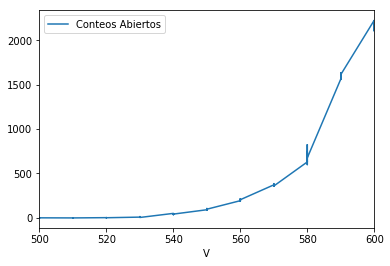

In [5]:
datos.plot(x="V",y="Conteos Abiertos",kind="line")

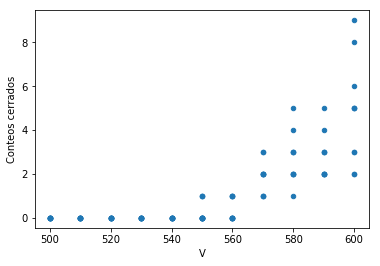

In [6]:
datos.plot(x="V",y="Conteos cerrados",kind="scatter")

In [7]:
STD_datos=datos.groupby("V").std()
STD_datos=STD_datos.reset_index()

In [8]:
Promedios_datos=datos.groupby("V").mean()
Promedios_datos=Promedios_datos.reset_index()

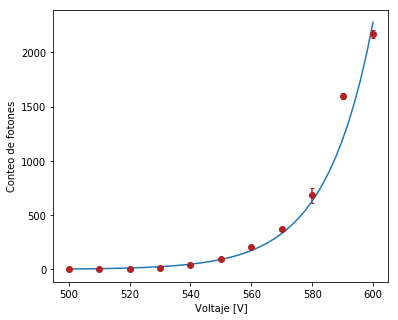

In [9]:
plt.figure(figsize=(6,5))
#plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
 #            color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick')
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             capsize=2,fmt="o",color="firebrick")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
x=np.linspace(500,600)
plt.plot(x,4*10**(-14)*np.exp(0.0643*x))
plt.show()

In [143]:
def model(x,a,b):
    return a*np.exp(b*x)
    #return a*np.exp(b*x)+c

In [144]:
x_obs=np.array(Promedios_datos["V"])
y_obs=np.array(Promedios_datos["Conteos Abiertos"])
sigma_y_obs=np.array(STD_datos["Conteos Abiertos"])

In [145]:
ajuste=[4*10**(-14),0.0643]

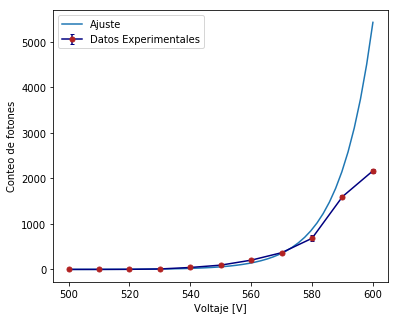

In [146]:
plt.figure(figsize=(6,5))
plt.errorbar(Promedios_datos["V"],Promedios_datos["Conteos Abiertos"],yerr=STD_datos["Conteos Abiertos"],
             color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick',label="Datos Experimentales")
#plt.errorbar(x_obs,y_obs,yerr=sigma_y_obs,capsize=2,fmt="o",color="firebrick")
plt.plot(x,model(x,np.exp(-46),0.091),label="Ajuste")
#plt.plot(x,model(x,ajuste[0],ajuste[1]),label="Ajuste")
plt.xlabel("Voltaje [V]")
plt.ylabel("Conteo de fotones")
plt.legend()
plt.show()

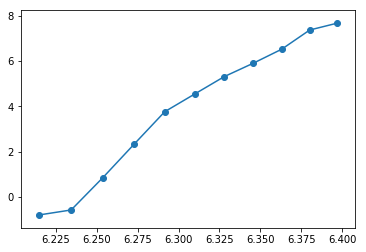

In [147]:
plt.plot(np.log(x_obs),np.log(y_obs))
plt.scatter(np.log(x_obs),np.log(y_obs))
plt.show()

In [148]:
def model(x,a,b):
    return a*x+b

In [149]:
y_obslog=np.log(y_obs)
popt, pcov = curve_fit(model, x_obs, y_obslog)
y_err=np.abs(1.0/(Promedios_datos["Conteos Abiertos"])*np.log(Promedios_datos["Conteos Abiertos"])*STD_datos["Conteos Abiertos"])
x=np.linspace(min(x_obs),max(x_obs))
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

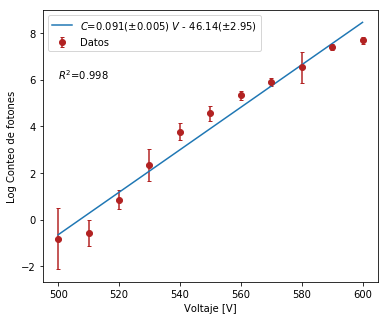

In [151]:
fig=plt.figure(figsize=(6,5))
#plt.errorbar(np.log(Promedios_datos["V"]),np.log(Promedios_datos["Conteos Abiertos"]),yerr=y_err,
             #color="navy",capsize=2,marker='.',mfc='firebrick',ms=10,mew=1,mec='firebrick',label="Datos Experimentales")
plt.errorbar(x_obs,y_obslog,yerr=y_err,capsize=2,fmt="o",color="firebrick",label="Datos")
            #ret += '({}{})'.format(i, '**%d' % num if num > 1 else '')
plt.plot(x,model(x,popt[0],popt[1]),label=r"$C$={}($\pm${}) $V$ {} {}($\pm${})".format(round(popt[0],3),
                                                                                    round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                    round(np.abs(popt[1]),2),round(perr[1],3)))
plt.text(500, 6, r'$R^2$={}'.format(round(R_2,3)))
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlabel("Voltaje [V]")
plt.ylabel("Log Conteo de fotones")
plt.legend()
plt.show()

In [152]:
conteos=pd.read_excel(Excel,sheet_name='Conteos_intensidad')

In [153]:
mean=conteos.groupby("intensidad ").mean().reset_index()
mean.columns=["Intensidad","Mean"]

In [154]:
mean_sqrt=np.sqrt(conteos.groupby("intensidad ").mean()).reset_index()
mean_sqrt.columns=["Intensidad","Mean sqrt"]

In [155]:
std=conteos.groupby("intensidad ").std().reset_index()
std.columns=["Intensidad","Std"]

In [156]:
total=pd.merge(mean,std,on="Intensidad")
total=pd.merge(total,mean_sqrt,on="Intensidad")
total["Log std"]=np.log(total["Std"])

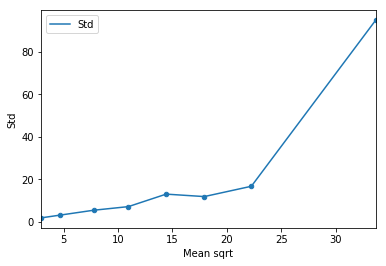

In [157]:
#ax = plt.gca()
ax=total.plot("Mean sqrt","Std",kind="scatter")
total.plot("Mean sqrt","Std",ax=ax)
plt.show()

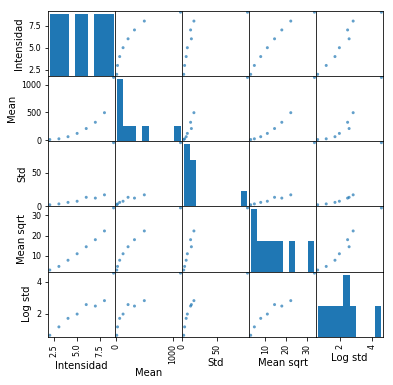

In [158]:
pd.plotting.scatter_matrix(total,figsize=(6, 6),alpha=0.7)
plt.show()

In [163]:
x_obs=total["Mean sqrt"]
y_obslog=total["Log std"]
x=np.linspace(min(x_obs),max(x_obs))
popt, pcov = curve_fit(model, x_obs, y_obslog)
perr = np.sqrt(np.diag(pcov))
R_2=np.abs(pcov[1,0]/np.sqrt(pcov[0,0]*pcov[1,1]))

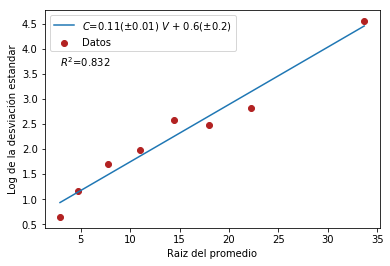

In [176]:
plt.scatter(total["Mean sqrt"],total["Log std"],color="firebrick",label="Datos")
#total.plot("Mean sqrt","Log std",ax=ax)
plt.plot(x,model(x,popt[0],popt[1]),label=r"$C$={}($\pm${}) $V$ {} {}($\pm${})".format(round(popt[0],2),
                                                                                round(perr[0],3),"+" if popt[1]>0 else "-",
                                                                                round(np.abs(popt[1]),2),round(perr[1],1)))
plt.text(min(x_obs), 0.8*max(y_obslog), r'$R^2$={}'.format(round(R_2,3)))
plt.legend()
plt.xlabel("Raiz del promedio")
plt.ylabel("Log de la desviación estandar")
plt.show()